# RQ2

## RQ2a

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score

In [2]:
results_moralexceptqa = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])

results_ethics_cs = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_deo = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_justice = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_util = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])
results_ethics_virtue = pd.DataFrame(columns=["model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"])

In [3]:
languages = ["chinese", "english", "german", "hindi", "spanish", "urdu"]
model_names = ["3_2", "3_1", "OLMo_2", "Phi", "Mistral", "Qwen2_5", "deepseek"]

In [4]:
# MoralExceptQA
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/MEQ_Results/binary_eval_results_scenario_meta-llama_Llama-3_1-8B-Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_path = "/shared/2/projects/moral-project/MEQ_Results/"
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for fname in os.listdir(base_file_path):
    if "metrics" in fname:
        continue

    if "scenario" in fname:
        lang = "english"
    else:
        for lang in languages:
            if lang.lower() in fname.lower():
                break
    if "OLMo-2" in fname:
        model = "OLMo_2"
    else:
        for model in model_names:
            if model.lower() in fname.lower():
                break
    
    with open(base_file_path+fname, "r") as f:
        data = json.load(f)

    parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
    idxs[model][lang] = [i for i,r in parsed]
    parsed = [r for i,r in parsed]
    try:
        instances = [r['scenario'] for r in parsed]
    except:
        instances = [r['question'] for r in parsed]
    predictions = [r["parsed_answer"] for r in parsed]
    references = [r["reference"] for r in parsed]

    scenarios[model][lang] = instances
    responses[model][lang] = predictions
    ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_moralexceptqa.loc[len(results_moralexceptqa)] = row

In [5]:
# Ethics-CS
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_cms_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "cms" not in fname.lower() and "commonsense" not in fname.lower():
            continue

        if "commonsense" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_cs.loc[len(results_ethics_cs)] = row

In [6]:
# Ethics-Deo
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_den_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "den" not in fname.lower() and "deontology" not in fname.lower():
            continue

        if "deontology" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_deo.loc[len(results_ethics_deo)] = row

In [7]:
# Ethics-justice
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_justice_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "justice" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [r["reference"] for r in parsed]

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_justice.loc[len(results_ethics_justice)] = row

In [8]:
# Ethics-util
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_util_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "util" not in fname.lower() and "utilitarian" not in fname.lower():
            continue

        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama_3_1" in fname.lower() or "llama_3_2" in fname.lower():
        #     if "fixed" not in fname.lower():
        #         continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [1] * len(parsed)

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references
       
for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_util.loc[len(results_ethics_util)] = row

In [9]:
# Ethics-virtue
## Get English reference scenarios
english_file_path = "/shared/2/projects/moral-project/ETHICS_Results_sf/para_virtue_English_results_meta_llama_Llama_3_1_8B_Instruct.json"
with open(english_file_path, "r") as f:
    english_data = json.load(f)
english_data = english_data['results']
try:
    reference_scenarios = [r['scenario'] for r in english_data]
except:
    reference_scenarios = [r['question'] for r in english_data]
reference_ground_truth = [r['reference'] for r in english_data]

base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
scenarios = {model : {lang: [] for lang in languages} for model in model_names}
responses = {model : {lang: [] for lang in languages} for model in model_names}
ground_truths = {model : {lang: [] for lang in languages} for model in model_names}
idxs = {model : {lang: [] for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "virtue" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["results"]
        except:
            data = data[:-1]

        parsed = [(i,r) for i,r in enumerate(data) if r["parsed_answer"] in {0, 1}]
        idxs[model][lang] = [i for i,r in parsed]
        parsed = [r for i,r in parsed]
        try:
            instances = [r['scenario'] for r in parsed]
        except:
            instances = [r['question'] for r in parsed]
        predictions = [r["parsed_answer"] for r in parsed]
        references = [1] * len(parsed)

        scenarios[model][lang] = instances
        responses[model][lang] = predictions
        ground_truths[model][lang] = references

for model in model_names:
    # "model", "reference_scenario", "reference_ground_truth", "english_scenario", "english_scenario_idx", "chinese_scenario", "chinese_scenario_idx", "german_scenario", "german_scenario_idx", "hindi_scenario", "hindi_scenario_idx", "spanish_scenario", "spanish_scenario_idx", "urdu_scenario", "urdu_scenario_idx", "english_ground_truth", "chinese_ground_truth", "german_ground_truth", "hindi_ground_truth", "spanish_ground_truth", "urdu_ground_truth", "chinese_response", "english_response", "german_response", "hindi_response", "spanish_response", "urdu_response"
    row = [model, reference_scenarios, reference_ground_truth, scenarios[model]["english"], idxs[model]['english'], scenarios[model]["chinese"], idxs[model]['chinese'], scenarios[model]["german"], idxs[model]['german'], scenarios[model]["hindi"], idxs[model]['hindi'], scenarios[model]["spanish"], idxs[model]['spanish'], scenarios[model]["urdu"], idxs[model]['urdu'], ground_truths[model]['english'], ground_truths[model]['chinese'], ground_truths[model]['german'], ground_truths[model]['hindi'], ground_truths[model]['spanish'], ground_truths[model]['urdu'], responses[model]["chinese"], responses[model]["english"], responses[model]["german"], responses[model]["hindi"], responses[model]["spanish"], responses[model]["urdu"]]
    results_ethics_virtue.loc[len(results_ethics_virtue)] = row

In [10]:
all_df = [results_moralexceptqa, results_ethics_cs, results_ethics_deo, results_ethics_justice, results_ethics_util, results_ethics_virtue]

In [11]:
import pickle

def load_emfd_dict_from_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)
    
emfd_dict_english = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_english_seamless.pkl")
emfd_dict_chinese = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_chinese_seamless.pkl")
emfd_dict_german = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_german_seamless.pkl")
emfd_dict_hindi = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_hindi_seamless.pkl")
emfd_dict_spanish = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_spanish_seamless.pkl")
emfd_dict_urdu = load_emfd_dict_from_pickle("MoralDicts/emfd_dict_urdu_seamless.pkl")

In [12]:
from collections import defaultdict
import jieba

def preprocess(text, lang='english'):
    if lang == 'chinese':
        tokens = [x for x in jieba.cut(text)]
    else:
        tokens = text.lower().split()
    return tokens

def get_moral_scores_rich(text, emfd_dict, lang = "english"):
    if lang == 'chinese':
        lemmas = preprocess(text, lang='chinese')
    else:
        lemmas = preprocess(text)
    prob_scores = defaultdict(float)
    sent_scores = defaultdict(float)

    for lemma in lemmas:
        if lemma in emfd_dict:
            for dim, val in emfd_dict[lemma].items():
                if dim.endswith('_p'):
                    prob_scores[dim[:-2]] += val
                elif dim.endswith('_sent'):
                    sent_scores[dim[:-5]] += val

    return {'prob': dict(prob_scores), 'sent': dict(sent_scores)}

In [ ]:
lang_to_scenario_col = {
    'english': 'english_scenario',
    'chinese': 'chinese_scenario',
    'german': 'german_scenario',
    'hindi': 'hindi_scenario',
    'spanish': 'spanish_scenario',
    'urdu': 'urdu_scenario'
}
lang_to_emfd_dict = {
    'english': emfd_dict_english,
    'chinese': emfd_dict_chinese,
    'german': emfd_dict_german,
    'hindi': emfd_dict_hindi,
    'spanish': emfd_dict_spanish,
    'urdu': emfd_dict_urdu
}

for df in all_df:
    for lang in lang_to_scenario_col:
        scenario_col = lang_to_scenario_col[lang]
        emfd_dict = lang_to_emfd_dict[lang]
        emfd_scores_col = f"{lang}_emfd_scores"
        emfd_scores = []
        for scenario_list in df[scenario_col]:
            scenario_scores = []
            for scenario in scenario_list:
                scores = get_moral_scores_rich(scenario, emfd_dict, lang=lang)
                scenario_scores.append(scores)
            emfd_scores.append(scenario_scores)
        df[emfd_scores_col] = emfd_scores


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.377 seconds.
Prefix dict has been built successfully.


In [ ]:
import numpy as np
import pandas as pd

languages = ['english', 'chinese', 'german', 'hindi', 'spanish', 'urdu']
emfd_dims = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

agg_emfd = {lang: {'moral': [], 'immoral': []} for lang in languages}

for df in all_df:
    for lang in languages:
        response_col = f"{lang}_response"
        emfd_scores_col = f"{lang}_emfd_scores"
        for idx, row in df.iterrows():
            responses = row[response_col]
            emfd_scores = row[emfd_scores_col]
            for i, resp in enumerate(responses):
                score_dict = emfd_scores[i]
                if isinstance(score_dict, list):
                    score_dict = score_dict[0]
                prob_scores = score_dict['prob'] if 'prob' in score_dict else score_dict
                emfd_vec = [prob_scores.get(dim, np.nan) for dim in emfd_dims]
                if resp == 1:
                    agg_emfd[lang]['moral'].append(emfd_vec)
                elif resp == 0:
                    agg_emfd[lang]['immoral'].append(emfd_vec)


In [ ]:
for lang in agg_emfd:
    for label in ['moral', 'immoral']:
        cleaned = []
        for vec in agg_emfd[lang][label]:
            arr = np.array(vec)
            if not np.any(np.isnan(arr)):
                cleaned.append(vec)
        agg_emfd[lang][label] = cleaned

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rcParams

In [ ]:
emfd_dims = ['care', 'fairness', 'loyalty', 'authority', 'sanctity']

records = []
for lang, label_data in agg_emfd.items():
    rows = []
    for label, y in [('moral', 1), ('immoral', 0)]:
        for vec in label_data[label]:
            rows.append({
                'language': lang,
                'label': y,
                **{dim: v for dim, v in zip(emfd_dims, vec)}
            })
    df_lang = pd.DataFrame(rows)
    X = sm.add_constant(df_lang[emfd_dims])
    y = df_lang['label']
    model = sm.Logit(y, X).fit(disp=False)
    
    for dim in emfd_dims:
        coef = model.params[dim]
        ci_low, ci_high = model.conf_int().loc[dim]
        significant = not (ci_low <= 0 <= ci_high)
        records.append({
            'language': lang,
            'foundation': dim,
            'coef': coef,
            'significant': significant
        })

df = pd.DataFrame(records)

In [ ]:
coef_matrix = df.pivot(index='language', columns='foundation', values='coef')
sig_mask = df.pivot(index='language', columns='foundation', values='significant')

coef_matrix_z = coef_matrix.sub(coef_matrix.mean(axis=1), axis=0)
coef_matrix_z = coef_matrix_z.div(coef_matrix.std(axis=1), axis=0)

annot = sig_mask.applymap(lambda x: "*" if x else "")

capitalized_xticklabels = [label.capitalize() for label in coef_matrix_z.columns]
capitalized_yticklabels = [label.capitalize() for label in coef_matrix_z.index]

/tmp/ipykernel_3559531/2870876038.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = sig_mask.applymap(lambda x: "*" if x else "")


In [19]:
sig_mask = sig_mask.reindex(['chinese', 'urdu', 'english', 'hindi', 'german', 'spanish'])
sig_mask


foundation,authority,care,fairness,loyalty,sanctity
language,,,,,
chinese,True,True,False,False,True
urdu,True,False,True,True,False
english,False,True,True,True,True
hindi,False,False,True,True,False
german,True,True,True,True,False
spanish,False,False,False,True,False


/tmp/ipykernel_3559531/554566105.py:87: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


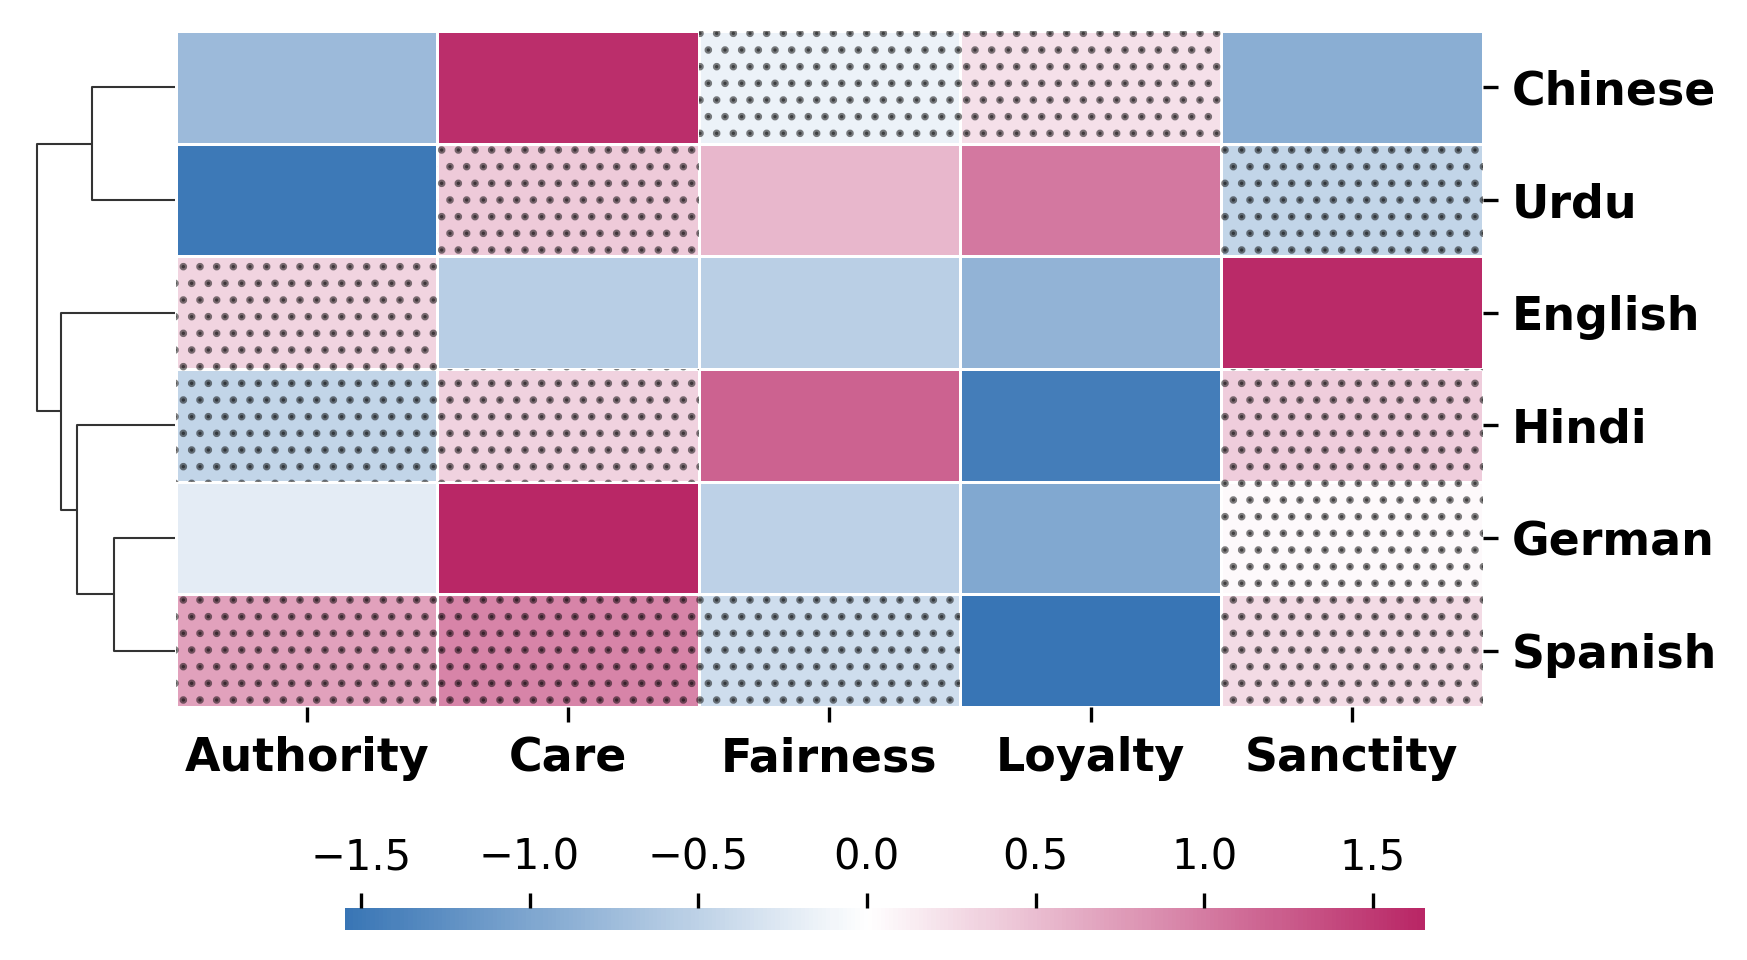

In [ ]:
rcParams.update({
    "font.size": 10,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 300,
    "axes.labelweight": "bold",
    "axes.labelsize": 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans", "Arial", "Liberation Sans"],
})


from matplotlib.colors import LinearSegmentedColormap
colors = ["#2b6cb0", "white", "#B92766"]

custom_cmap = LinearSegmentedColormap.from_list("rq3_blue_diverging", colors, N=256)

g = sns.clustermap(
    coef_matrix_z,
    cmap=custom_cmap,
    center=0,
    figsize=(6, 3),
    fmt='',
    annot_kws={"fontsize": 16, "fontweight": "bold", "color": "#222"},
    linewidths=0.7,
    linecolor='white',
    cbar_kws={'label': '', 'orientation': 'horizontal', 'shrink': 0.7, 'pad': 0.08},
    row_cluster=True,
    col_cluster=False,
    dendrogram_ratio=(.10, 0),
    xticklabels=capitalized_xticklabels,
    yticklabels=capitalized_yticklabels,
)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=0, fontsize=11, fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=11, fontweight='bold')
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")

for spine in g.ax_heatmap.spines.values():
    spine.set_visible(False)

g.cax.set_position([.2, -0.05, .6, .025])

g.cax.xaxis.set_label_position('top')
g.cax.xaxis.set_ticks_position('top')

import numpy as np
import matplotlib.patches as mpatches
insig_mask = ~sig_mask.values

nrows, ncols = coef_matrix_z.shape
for i in range(nrows):
    for j in range(ncols):
        if insig_mask[i, j]:
            rect = mpatches.Rectangle(
                (j, i), 1, 1,
                fill=False,
                hatch='...',
                edgecolor='black',
                linewidth=0,
                # zorder=10,
                alpha=0.5
            )
            g.ax_heatmap.add_patch(rect)

plt.tight_layout()
plt.savefig("FinalPlots/row_clustered_moral_heatmap.pdf", bbox_inches='tight', dpi=300)
plt.show()
